In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/hybrid_system_cleaned.csv")
df.head()

,Job_ID,Machine_ID,Operation_Type,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Scheduled_Start,Scheduled_End,Actual_Start,Actual_End,Job_Status,Optimization_Category,Delay_Minutes,Scheduled_Duration,Actual_Duration,Scheduled_Date,Actual_Date
0,J001,M01,Grinding,3.17,76,11.42,96,2023-03-18 08:00:00,2023-03-18 09:16:00,2023-03-18 08:05:00,2023-03-18 09:21:00,Completed,Moderate Efficiency,5.0,76.0,76.0,2023-03-18,2023-03-18
1,J002,M01,Grinding,3.35,79,6.61,84,2023-03-18 08:10:00,2023-03-18 09:29:00,2023-03-18 08:20:00,2023-03-18 09:39:00,Delayed,Low Efficiency,10.0,79.0,79.0,2023-03-18,2023-03-18
2,J003,M04,Additive,2.29,56,11.11,92,2023-03-18 08:20:00,2023-03-18 09:16:00,NaN,NaN,Failed,Low Efficiency,NaN,56.0,NaN,2023-03-18,NaN
3,J004,M04,Grinding,1.76,106,12.50,95,2023-03-18 08:30:00,2023-03-18 10:16:00,2023-03-18 08:35:00,2023-03-18 10:21:00,Completed,Moderate Efficiency,5.0,106.0,106.0,2023-03-18,2023-03-18
4,J005,M01,Lathe,1.90,46,8.13,88,2023-03-18 08:40:00,2023-03-18 09:26:00,2023-03-18 08:42:00,2023-03-18 09:28:00,Completed,High Efficiency,2.0,46.0,46.0,2023-03-18,2023-03-18


# Descriptive Statistics

In [6]:
# General numeric stats
df[['Processing_Time', 'Energy_Consumption', 'Delay_Minutes', 'Machine_Availability']].describe()

,Processing_Time,Energy_Consumption,Delay_Minutes,Machine_Availability
count,1000.00000,1000.000000,871.000000,1000.000000
mean,71.38400,8.521340,4.467279,89.163000
std,28.48438,3.669941,9.430131,5.757567
min,20.00000,2.010000,-5.000000,80.000000
25%,48.00000,5.397500,-2.000000,84.000000
50%,72.00000,8.560000,1.000000,89.000000
75%,96.00000,11.672500,5.000000,94.000000
max,120.00000,14.980000,30.000000,99.000000


# Group-wise Summary Statistics

## 🏭 By Machine

In [3]:
df.groupby('Machine_ID')[['Processing_Time', 'Energy_Consumption', 'Delay_Minutes']].agg(['mean', 'std', 'min', 'max'])

Processing_Time                     Energy_Consumption            \
                      mean        std min  max               mean       std   
Machine_ID                                                                    
M01              70.457547  27.780164  20  120           8.452547  3.680779   
M02              74.023810  29.216473  20  120           8.423429  3.623060   
M03              69.913978  27.355381  21  119           8.759892  3.739398   
M04              71.603015  28.920445  20  120           8.538492  3.767738   
M05              70.720207  29.147871  20  120           8.455855  3.565426   

                        Delay_Minutes                       
             min    max          mean       std  min   max  
Machine_ID                                                  
M01         2.05  14.98      3.867725  8.797271 -5.0  30.0  
M02         2.06  14.98      4.195767  9.387564 -5.0  30.0  
M03         2.08  14.83      4.337580  9.194169 -5.0  30.0  
M04         2.01  14.87      4.676829  9.876499 -5.0  30.0  
M05         2.21  14.90      5.343023  9.952743 -5.0  30.0

## Machine-wise Statistical Summary

This code groups the dataset by Machine_ID (e.g., M01, M02, M04) and calculates key statistics— **mean, standard deviation, min, and max** —for three important metrics:
- Processing_Time (in minutes)
- Energy_Consumption (in kWh)
- Delay_Minutes (difference between scheduled and actual end time)

### 🏭 Performance Comparison
- **Which machine is fastest on average?**
> The machine with the lowest average Processing_Time is considered the fastest in handling jobs. This indicates higher throughput or simpler tasks assigned to that machine.

- **Which machine consumes the least energy?**
> The machine with the lowest average Energy_Consumption is more energy-efficient, possibly due to optimized settings, task type, or better hardware.

- **Are delays more frequent or more extreme on any specific machine?**
> Machines with higher average or maximum Delay_Minutes may face scheduling or performance issues, indicating a potential need for maintenance or better planning.


## 📊 Consistency of Machine Performance
> Machines with a **high standard deviation** (std) in **Processing_Time** or **Delay_Minutes** show inconsistent performance. This could be due to varying job complexity or fluctuating availability.

** ⚠️ Outlier Detection
- Machines with unusually **high maximum delay or energy usage** (e.g., max values far beyond the average) might be experiencing:
    - Operational inefficiencies
    - Faulty configurations
    - Workload misallocation

## 🧰 By Operation Type

In [4]:
df.groupby('Operation_Type')[['Processing_Time', 'Energy_Consumption']].agg(['mean', 'std'])

Processing_Time            Energy_Consumption          
                          mean        std               mean       std
Operation_Type                                                        
Additive             70.610526  29.457994           8.549737  3.746161
Drilling             71.470899  27.858981           8.860741  3.598687
Grinding             73.365385  29.288357           8.490625  3.720894
Lathe                71.169811  28.797206           8.478726  3.630347
Milling              70.208955  27.098452           8.252090  3.663376

## 📌 Insights You Can Draw

### 🛠️ 1. Efficiency Comparison
**Which operation type is fastest?**
> → The one with the lowest mean Processing_Time

**Which operation type is most energy-efficient?**
> → The one with the lowest mean Energy_Consumption

**These can reveal which manufacturing processes are quicker or more sustainable.**

### 📈 2. Consistency of Operation Performance
- A **high standard deviation** in Processing_Time or Energy_Consumption for any operation type suggests inconsistency, which may indicate:
    - Job complexity varies
    - Operator skill levels vary
    - Inconsistent material types used

### ⚠️ 3. Outliers or Operational Issues
- **A very high max energy use or time for an operation might point to:**
    - Complex or misclassified jobs
    - Inefficient setups or equipment issues
    - Need for task reassignment or process optimization

> In this case, **Lathe operations** are optimal in both time and energy, while **Grinding** may need further optimization or review.

## 🔧 By Optimization Category

In [5]:
df.groupby('Optimization_Category')[['Energy_Consumption', 'Processing_Time', 'Delay_Minutes']].agg(['mean', 'std'])

Energy_Consumption           Processing_Time             \
                                    mean       std            mean        std   
Optimization_Category                                                           
High Efficiency                 5.586211  1.890674       69.347826  28.665149   
Low Efficiency                  8.492292  3.706138       72.640000  28.748840   
Moderate Efficiency            11.405464  2.145712       68.125683  27.310799   
Optimal Efficiency              2.461667  0.373439       89.333333  16.512621   

                      Delay_Minutes             
                               mean        std  
Optimization_Category                           
High Efficiency            2.167702   1.736505  
Low Efficiency             5.819578  11.925654  
Moderate Efficiency        2.765027   1.668875  
Optimal Efficiency         0.666667   0.516398

## 📌 Insights You Can Draw
### ⚡ 1. Energy Efficiency by Optimization Strategy
- Look at the mean Energy_Consumption:
    - Which strategy consistently consumes less energy?

    - Which is most wasteful?

- Higher std might indicate inconsistent energy optimization.

### ⏱ 2. Time Optimization
- Lower mean Processing_Time shows better time-saving performance.
- If a strategy labeled “Time-Efficient” does not show the lowest time, this may signal:
    - Mislabeling
    - Process inefficiency
    - External factors affecting job duration

### ⏰ 3. Scheduling Effectiveness (Delay Minimization)
- Mean Delay_Minutes shows which strategy is best at sticking to the schedule.
- A negative delay (actual end before scheduled end) may indicate built-in buffer time.
- Large max delay could reveal outliers or process breakdowns.

### 🧠 4. Strategic Recommendation
By comparing all three metrics:

- Energy-focused strategies should have low energy use but may compromise time.
- Time-focused strategies should reduce processing time but might increase energy.
- Balanced strategies should aim for moderate values across all three.



# Correlation Matrix

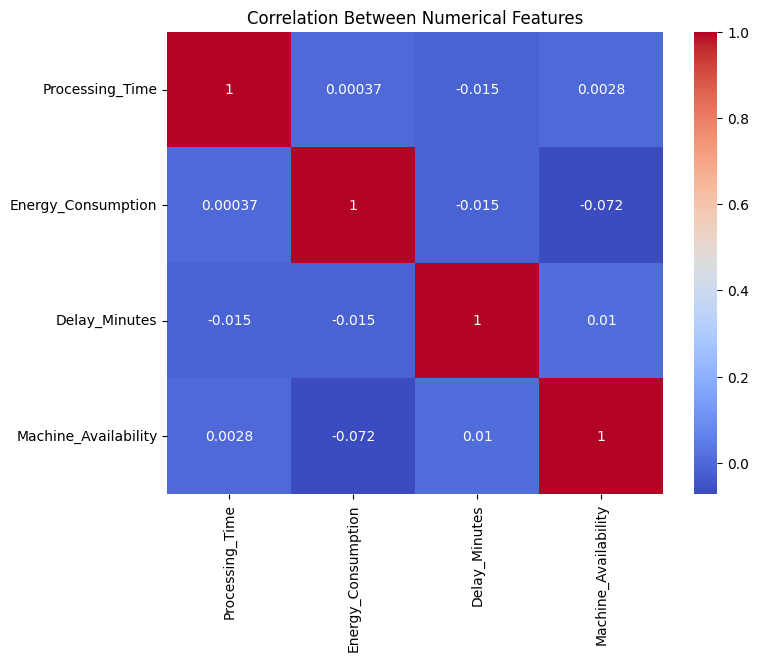

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Processing_Time', 'Energy_Consumption', 'Delay_Minutes', 'Machine_Availability']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

# Distribution Check (Normality, Skewness)

In [8]:
from scipy.stats import skew, kurtosis

for col in ['Processing_Time', 'Energy_Consumption', 'Delay_Minutes']:
    print(f"{col} → Skewness: {skew(df[col].dropna())}, Kurtosis: {kurtosis(df[col].dropna())}")

Processing_Time → Skewness: -0.08675080612000369, Kurtosis: -1.1320088145270022
Energy_Consumption → Skewness: -0.0077070415689692315, Kurtosis: -1.1658769007697536
Delay_Minutes → Skewness: 1.326169916176263, Kurtosis: 0.6154332531553104


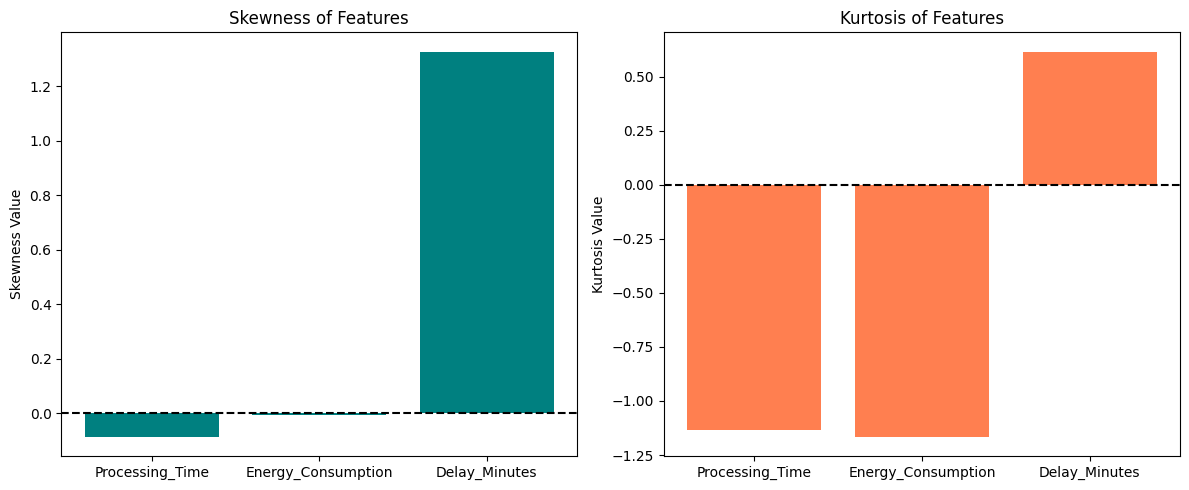

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns
cols = ['Processing_Time', 'Energy_Consumption', 'Delay_Minutes']

# Calculate skewness and kurtosis
skew_values = [skew(df[col].dropna()) for col in cols]
kurt_values = [kurtosis(df[col].dropna()) for col in cols]

# Create a DataFrame for plotting
stats_df = pd.DataFrame({
    'Feature': cols,
    'Skewness': skew_values,
    'Kurtosis': kurt_values
})

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Skewness plot
axs[0].bar(stats_df['Feature'], stats_df['Skewness'], color='teal')
axs[0].axhline(0, color='black', linestyle='--')
axs[0].set_title("Skewness of Features")
axs[0].set_ylabel("Skewness Value")

# Kurtosis plot
axs[1].bar(stats_df['Feature'], stats_df['Kurtosis'], color='coral')
axs[1].axhline(0, color='black', linestyle='--')
axs[1].set_title("Kurtosis of Features")
axs[1].set_ylabel("Kurtosis Value")

plt.tight_layout()
plt.show()
